In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [2]:
df=pd.read_csv('cleaned_finalinvoice.csv')
df.drop
df.head()

,Unnamed: 0,Cust Type,Customer No.,Insurance Company,Invoice Date,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,City,State,Year,Month
0,0,Retail,67849,NaN,2015-01-02,168303,2014-12-13,14:29:43,49317,1203.140000,GENERAL MOTORS,0.000000,SPARK,500.060000,Paid Service,2348.750000,400601,BC01,THANE,NO,0.000000,RUPESH,4051.950000,4051.950000,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,thane,maharashtra,2014,12
1,1,Retail,84419,NaN,2015-01-03,173997,2015-01-02,14:12:18,78584,804.260000,TATA MOTORS,197.030000,INDICA,0.000000,SMC Value Package,0.000000,400603,BC01,THANE,NO,0.000000,PRASHANT,1001.290000,1001.290000,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,thane,maharashtra,2015,1
2,2,Retail,81055,NaN,2015-01-03,173889,2015-01-02,11:40:44,33985,180.190000,MARUTI SUZUKI,0.000000,ZEN,0.000000,Running Repairs,52.950000,400607,BC01,THANE,NO,0.000000,IMRAN,233.140000,233.140000,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13.000000000,thane,maharashtra,2015,1
3,3,Retail,84419,NaN,2015-01-03,174158,2015-01-03,10:12:32,78584,0.000000,TATA MOTORS,0.000000,INDICA,0.000000,SMC Redemption,0.000000,400603,BC01,THANE,NO,0.000000,PRASHANT,1674.224330,1644.700000,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12.000000000,thane,maharashtra,2015,1
4,4,Retail,18980,NaN,2015-01-03,173860,2015-01-02,10:45:42,50057,1202.970000,HYUNDAI,100.000000,SANTRO XING,499.990000,Paid Service,944.160000,400603,BC01,THANE,NO,0.000000,DAYANAND,2747.120000,2747.120000,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35.000000000,thane,maharashtra,2015,1


In [3]:
df = df.rename(columns={'Total Amt Wtd Tax.':'Total_Expense'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477925 entries, 0 to 477924
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         477925 non-null  int64  
 1   Cust Type          477925 non-null  object 
 2   Customer No.       477925 non-null  object 
 3   Insurance Company  23071 non-null   object 
 4   Invoice Date       477925 non-null  object 
 5   Job Card No        477925 non-null  int64  
 6   JobCard Date       477925 non-null  object 
 7   JobCard Time       477925 non-null  object 
 8   KMs Reading        477925 non-null  int64  
 9   Labour Total       477925 non-null  float64
 10  Make               477925 non-null  object 
 11  Misc Total         477925 non-null  float64
 12  Model              477925 non-null  object 
 13  OSL Total          477925 non-null  float64
 14  Order Type         477925 non-null  object 
 15  Parts Total        477925 non-null  float64
 16  Pi

In [5]:
df["Invoice_DateTime"] = pd.to_datetime(df["Invoice_DateTime"])
df["JobCard_DateTime"] = pd.to_datetime(df["JobCard_DateTime"])

In [6]:
df['Job_duration(in hrs)']=(df['Invoice_DateTime'] -df['JobCard_DateTime']).astype('timedelta64[h]')

In [7]:
df.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Insurance Company',
       'Invoice Date', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Technician Name',
       'Total_Expense', 'Total Value', 'User ID', 'Invoice_DateTime',
       'JobCard_DateTime', 'Service_Time', 'City', 'State', 'Year', 'Month',
       'Job_duration(in hrs)'],
      dtype='object')

In [8]:
df['Cust Type'].value_counts()

Retail              474647
Fleets                2193
Corporate others       568
Corporate- M&M         252
MFCWL                  249
Franchise               15
Insurance                1
Name: Cust Type, dtype: int64

In [9]:

cluster_df = df[['Cust Type','Customer No.','Make','Year','Model','Order Type','City',"State",'Job_duration(in hrs)','Total_Expense']]

In [10]:
cluster_df

,Cust Type,Customer No.,Make,Year,Model,Order Type,City,State,Job_duration(in hrs),Total_Expense
0,Retail,67849,GENERAL MOTORS,2014,SPARK,Paid Service,thane,maharashtra,477.000000,4051.950000
1,Retail,84419,TATA MOTORS,2015,INDICA,SMC Value Package,thane,maharashtra,19.000000,1001.290000
2,Retail,81055,MARUTI SUZUKI,2015,ZEN,Running Repairs,thane,maharashtra,23.000000,233.140000
3,Retail,84419,TATA MOTORS,2015,INDICA,SMC Redemption,thane,maharashtra,1.000000,1674.224330
4,Retail,18980,HYUNDAI,2015,SANTRO XING,Paid Service,thane,maharashtra,25.000000,2747.120000
...,...,...,...,...,...,...,...,...,...,...
477920,Retail,35648,MARUTI SUZUKI,2016,WAGONR,Paid Service,surat,gujarat,0.000000,554.740000
477921,Retail,199624,MAHINDRA & MAHINDRA,2016,SCORPIO NEF,Running Repairs,pune,maharashtra,189.000000,8118.280000
477922,Retail,192925,MARUTI SUZUKI,2016,ERTIGA,Accidental,pune,maharashtra,641.000000,5418.190000
477923,Retail,201760,HYUNDAI,2016,I10,Accidental,nizamabad,telangana,48.000000,5353.140000


In [11]:
cluster_df.isnull().sum()

Cust Type               0
Customer No.            0
Make                    0
Year                    0
Model                   0
Order Type              0
City                    0
State                   0
Job_duration(in hrs)    0
Total_Expense           0
dtype: int64

In [12]:
cluster_df.Year.value_counts()

2016    189751
2015    121807
2014     93252
2013     54755
2012     18360
Name: Year, dtype: int64

In [13]:
clusters = cluster_df.groupby(['Customer No.','Cust Type','Make',"Year",'Model','City',"State",'Order Type']).agg(
                                {         'Total_Expense':'sum',
                                 'Job_duration(in hrs)':'mean'
                                }
                            )

In [14]:
clusters.head(10)

Total_Expense  \
Customer No. Cust Type Make           Year Model City   State       Order Type                       
1            Retail    MARUTI SUZUKI  2013 OMNI  pune   maharashtra Running Repairs    2835.560000   
10           Retail    GENERAL MOTORS 2012 OPTRA mumbai maharashtra Paid Service       5562.050000   
                                                                    Running Repairs     599.840000   
                                      2013 OPTRA mumbai maharashtra Paid Service       4943.670000   
100          Retail    HONDA          2012 CITY  mumbai maharashtra Accidental        14167.070000   
                                                                    Paid Service       6632.670000   
1000         Retail    MARUTI SUZUKI  2012 ALTO  pune   maharashtra Paid Service       2817.570000   
                                      2013 ALTO  pune   maharashtra Paid Service       1980.840000   
                                                                    Running Repairs     749.420000   
                                      2014 ALTO  pune   maharashtra Paid Service       2818.860000   

                                                                                     Job_duration(in hrs)  
Customer No. Cust Type Make           Year Model City   State       Order Type                             
1            Retail    MARUTI SUZUKI  2013 OMNI  pune   maharashtra Running Repairs            321.000000  
10           Retail    GENERAL MOTORS 2012 OPTRA mumbai maharashtra Paid Service                38.500000  
                                                                    Running Repairs              3.000000  
                                      2013 OPTRA mumbai maharashtra Paid Service                 5.000000  
100          Retail    HONDA          2012 CITY  mumbai maharashtra Accidental                  98.000000  
                                                                    Paid Service                49.000000  
1000         Retail    MARUTI SUZUKI  2012 ALTO  pune   maharashtra Paid Service                 3.500000  
                                      2013 ALTO  pune   maharashtra Paid Service                 2.000000  
                                                                    Running Repairs              5.000000  
                                      2014 ALTO  pune   maharashtra Paid Service                 7.000000

In [15]:
clusters.columns

Index(['Total_Expense', 'Job_duration(in hrs)'], dtype='object')

In [16]:
clusters.columns =['Total Revenue','Total Servicing Hrs']

In [17]:
clusters = clusters.reset_index()
clusters

,Customer No.,Cust Type,Make,Year,Model,City,State,Order Type,Total Revenue,Total Servicing Hrs
0,1,Retail,MARUTI SUZUKI,2013,OMNI,pune,maharashtra,Running Repairs,2835.560000,321.000000
1,10,Retail,GENERAL MOTORS,2012,OPTRA,mumbai,maharashtra,Paid Service,5562.050000,38.500000
2,10,Retail,GENERAL MOTORS,2012,OPTRA,mumbai,maharashtra,Running Repairs,599.840000,3.000000
3,10,Retail,GENERAL MOTORS,2013,OPTRA,mumbai,maharashtra,Paid Service,4943.670000,5.000000
4,100,Retail,HONDA,2012,CITY,mumbai,maharashtra,Accidental,14167.070000,98.000000
...,...,...,...,...,...,...,...,...,...,...
379886,PLX241,Franchise,MARUTI SUZUKI,2016,RITZ,nainital,uttarakhand,Running Repairs,3477.370000,0.000000
379887,PLX277,Retail,TATA MOTORS,2016,SUMO,jalpaiguri,west bengal,Running Repairs,6870.950000,49.000000
379888,PLX312,Retail,MAHINDRA & MAHINDRA,2016,SCORPIO CRDE,solapur,maharashtra,Running Repairs,567.800000,406.000000
379889,PLX380,Retail,MAHINDRA & MAHINDRA,2016,XUV 500,meerut,uttar pradesh,Running Repairs,4346.980000,0.000000


In [18]:
zero_spenders = clusters[clusters['Total Revenue']<=0]

In [19]:
zero_spenders

,Customer No.,Cust Type,Make,Year,Model,City,State,Order Type,Total Revenue,Total Servicing Hrs
1486,100857,Retail,HYUNDAI,2016,I20,rupnagar,punjab,SMC Redemption,0.000000,1.000000
2901,101678,Retail,MARUTI SUZUKI,2016,RITZ,panchkula,haryana,SMC Redemption,0.000000,25.500000
3468,102034,Retail,MARUTI SUZUKI,2016,ALTO,mohali,punjab,Running Repairs,0.000000,0.000000
3735,102199,Retail,MARUTI SUZUKI,2016,ERTIGA,rupnagar,punjab,Mechanical,0.000000,72.000000
5094,103036,Retail,HYUNDAI,2016,I20,pune,maharashtra,SMC Redemption,0.000000,363.000000
...,...,...,...,...,...,...,...,...,...,...
368464,99876,Retail,HYUNDAI,2016,I10,thane,maharashtra,SMC Redemption,0.000000,51.000000
373425,E20313,Retail,HYUNDAI,2016,SANTRO,chennai,tamil nadu,SMC Redemption,0.000000,125.000000
373763,E20938,Retail,TATA MOTORS,2016,INDIGO MANZA,nashik,maharashtra,Mechanical,0.000000,7.000000
378339,E4981,Fleets,MAHINDRA & MAHINDRA,2012,LOGAN P,chennai,tamil nadu,Workshop Damage,0.000000,837.000000


In [20]:
non_zero_spenders = clusters[clusters['Total Revenue']>0]

In [21]:
non_zero_spenders

,Customer No.,Cust Type,Make,Year,Model,City,State,Order Type,Total Revenue,Total Servicing Hrs
0,1,Retail,MARUTI SUZUKI,2013,OMNI,pune,maharashtra,Running Repairs,2835.560000,321.000000
1,10,Retail,GENERAL MOTORS,2012,OPTRA,mumbai,maharashtra,Paid Service,5562.050000,38.500000
2,10,Retail,GENERAL MOTORS,2012,OPTRA,mumbai,maharashtra,Running Repairs,599.840000,3.000000
3,10,Retail,GENERAL MOTORS,2013,OPTRA,mumbai,maharashtra,Paid Service,4943.670000,5.000000
4,100,Retail,HONDA,2012,CITY,mumbai,maharashtra,Accidental,14167.070000,98.000000
...,...,...,...,...,...,...,...,...,...,...
379886,PLX241,Franchise,MARUTI SUZUKI,2016,RITZ,nainital,uttarakhand,Running Repairs,3477.370000,0.000000
379887,PLX277,Retail,TATA MOTORS,2016,SUMO,jalpaiguri,west bengal,Running Repairs,6870.950000,49.000000
379888,PLX312,Retail,MAHINDRA & MAHINDRA,2016,SCORPIO CRDE,solapur,maharashtra,Running Repairs,567.800000,406.000000
379889,PLX380,Retail,MAHINDRA & MAHINDRA,2016,XUV 500,meerut,uttar pradesh,Running Repairs,4346.980000,0.000000


In [22]:
print("0.05 quantile :-",non_zero_spenders['Total Revenue'].quantile(0.05))
print("0.25 quantile :-",non_zero_spenders['Total Revenue'].quantile(0.25))
print("0.50 quantile :-",non_zero_spenders['Total Revenue'].quantile(0.50))
print("0.75 quantile :-",non_zero_spenders['Total Revenue'].quantile(0.75))
print("0.95 quantile :-",non_zero_spenders['Total Revenue'].quantile(0.95))
print("minimum total revenue :-",non_zero_spenders['Total Revenue'].min())
print("maximum total revenue :-",non_zero_spenders['Total Revenue'].max())
print("mean total revenue :-",non_zero_spenders['Total Revenue'].mean())

0.05 quantile :- 150.25
0.25 quantile :- 774.72
0.50 quantile :- 2714.98
0.75 quantile :- 5734.360000000001
0.95 quantile :- 21447.675999999992
minimum total revenue :- 0.01
maximum total revenue :- 3943244.7300000046
mean total revenue :- 5896.524469255041


In [23]:
print("0.05 quantile :-",non_zero_spenders['Total Servicing Hrs'].quantile(0.05))
print("0.25 quantile :-",non_zero_spenders['Total Servicing Hrs'].quantile(0.25))
print("0.50 quantile :-",non_zero_spenders['Total Servicing Hrs'].quantile(0.50))
print("0.75 quantile :-",non_zero_spenders['Total Servicing Hrs'].quantile(0.75))
print("0.95 quantile :-",non_zero_spenders['Total Servicing Hrs'].quantile(0.95))
print("mimimum servicing time in hrs :-",non_zero_spenders['Total Servicing Hrs'].min())
print("maximum servicing time in hrs :-",non_zero_spenders['Total Servicing Hrs'].max())
print("mean servicing time in hrs :-",non_zero_spenders['Total Servicing Hrs'].mean())

0.05 quantile :- 0.0
0.25 quantile :- 3.0
0.50 quantile :- 17.5
0.75 quantile :- 67.0
0.95 quantile :- 362.0
mimimum servicing time in hrs :- -1.0
maximum servicing time in hrs :- 17453.0
mean servicing time in hrs :- 84.7798864594545


# based on avg revenue

In [24]:
# Low revenue customers (less than 0.50 quantile)
low_revenue = non_zero_spenders[(non_zero_spenders['Total Revenue']< non_zero_spenders['Total Revenue'].quantile(0.50))]

# Medium revenue customers (between 0.50 to 0.75 quantile)
medium_revenue = non_zero_spenders[
                            (non_zero_spenders['Total Revenue'] > non_zero_spenders['Total Revenue'].quantile(0.50)) & 
                            (non_zero_spenders['Total Revenue']< non_zero_spenders['Total Revenue'].quantile(0.75))
                         ]

# Average revenue customers (between 0.75 to 0.95 quantile)
avg_revenue = non_zero_spenders[
                        (non_zero_spenders['Total Revenue'] > non_zero_spenders['Total Revenue'].quantile(0.75)) & 
                        (non_zero_spenders['Total Revenue'] < non_zero_spenders['Total Revenue'].quantile(0.95))
                      ]

# High revenue customers (moe than 0.95 quantile)
high_revenue = non_zero_spenders[
                        (non_zero_spenders['Total Revenue'] > non_zero_spenders['Total Revenue'].quantile(0.95))
                       ]

In [25]:
print("low_revenue",low_revenue.shape)
print("medium_revenue",medium_revenue.shape)
print("avg_revenue",avg_revenue.shape)
print("high_revenue",high_revenue.shape)

low_revenue (189211, 10)
medium_revenue (94605, 10)
avg_revenue (75684, 10)
high_revenue (18922, 10)


In [26]:
# Naming the clusters
low_revenue['Clusters'] = 'low_revenue'
medium_revenue['Clusters'] = 'medium_revenue'
avg_revenue['Clusters'] = 'avg_revenue'
high_revenue['Clusters'] = 'high_revenue'

In [27]:
revenue_clust = pd.concat([low_revenue,medium_revenue,avg_revenue,high_revenue],axis=0)

In [28]:
revenue_clust

,Customer No.,Cust Type,Make,Year,Model,City,State,Order Type,Total Revenue,Total Servicing Hrs,Clusters
2,10,Retail,GENERAL MOTORS,2012,OPTRA,mumbai,maharashtra,Running Repairs,599.840000,3.000000,low_revenue
7,1000,Retail,MARUTI SUZUKI,2013,ALTO,pune,maharashtra,Paid Service,1980.840000,2.000000,low_revenue
8,1000,Retail,MARUTI SUZUKI,2013,ALTO,pune,maharashtra,Running Repairs,749.420000,5.000000,low_revenue
10,1000,Retail,MARUTI SUZUKI,2014,ALTO,pune,maharashtra,Running Repairs,446.750000,5.000000,low_revenue
13,10000,Retail,MARUTI SUZUKI,2014,WAGONR,hyderabad,telangana,SMC Value Package,1001.290000,3.000000,low_revenue
...,...,...,...,...,...,...,...,...,...,...,...
379637,MFCWP01,MFCWL,MARUTI SUZUKI,2012,WAGONR,pune,maharashtra,Paid Service,25074.280000,52.333333,high_revenue
379645,MFCWP01,MFCWL,MARUTI SUZUKI,2013,SWIFT,pune,maharashtra,Paid Service,24515.270000,148.500000,high_revenue
379661,MFCWP01,MFCWL,TATA MOTORS,2013,INDICA,pune,maharashtra,Paid Service,35618.950000,263.500000,high_revenue
379668,MFCWP01,MFCWL,TOYOTA,2012,COROLLA,pune,maharashtra,Running Repairs,24141.050000,84.000000,high_revenue


In [29]:
revenue_clust.shape

(378422, 11)

In [30]:
['Make', 'Model', 'City', 'Customer No.', 'Invoice No', 'Total_Expense',
       'Job_duration(in hrs)', 'LTV', 'LTV Category']

['Make',
 'Model',
 'City',
 'Customer No.',
 'Invoice No',
 'Total_Expense',
 'Job_duration(in hrs)',
 'LTV',
 'LTV Category']

In [31]:
revenue_clust.groupby(['Clusters']).agg({'Total Revenue':'mean','Total Servicing Hrs':'mean','Customer No.':'count'}).sort_values('Total Revenue',ascending=False)

,Total Revenue,Total Servicing Hrs,Customer No.
Clusters,,,
high_revenue,46683.668236,338.677771,18922
avg_revenue,10571.673038,122.597043,75684
medium_revenue,3794.417993,66.730640,94605
low_revenue,998.631039,53.286867,189211


In [32]:
revenue_clust.groupby('Clusters')['Customer No.'].count()

Clusters
avg_revenue        75684
high_revenue       18922
low_revenue       189211
medium_revenue     94605
Name: Customer No., dtype: int64

In [33]:
revenue_clust.groupby('Clusters')['Total Revenue'].mean()

Clusters
avg_revenue      10571.673038
high_revenue     46683.668236
low_revenue        998.631039
medium_revenue    3794.417993
Name: Total Revenue, dtype: float64

In [36]:
import seaborn as sns

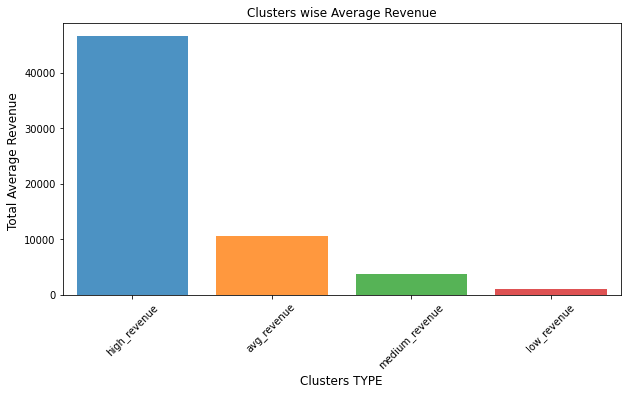

In [37]:
a=revenue_clust.groupby('Clusters')['Total Revenue'].mean().nlargest()
plt.figure(figsize=(10,5))
sns.barplot(a.index, a.values, alpha=0.8,saturation=50)
plt.title('Clusters wise Average Revenue')
plt.ylabel('Total Average Revenue ', fontsize=12)
plt.xlabel('Clusters TYPE', fontsize=12)
plt.xticks(rotation=45)
plt.show()

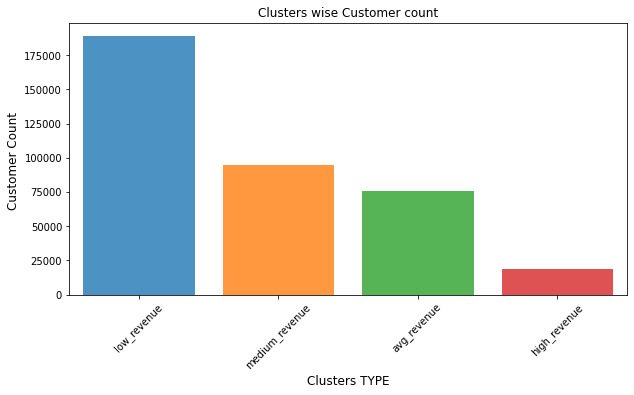

In [38]:
b=revenue_clust.groupby('Clusters')['Customer No.'].count().nlargest()
plt.figure(figsize=(10,5))
sns.barplot(b.index, b.values, alpha=0.8,saturation=50)
plt.title('Clusters wise Customer count')
plt.ylabel('Customer Count ', fontsize=12)
plt.xlabel('Clusters TYPE', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Total Servicing Hrs', ylabel='Total Revenue'>

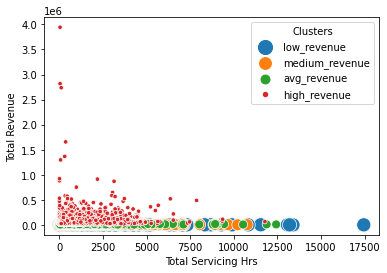

In [39]:
sns.scatterplot(
    data=revenue_clust, x="Total Servicing Hrs", y='Total Revenue', hue="Clusters", size="Clusters",
    sizes=(20, 200), legend="full"
)

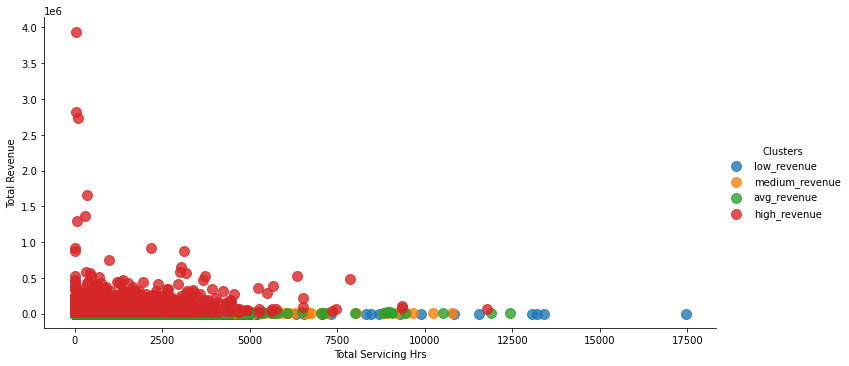

In [40]:
import seaborn as sns
sns.lmplot(data=revenue_clust,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})

# based on avg servicing time

In [41]:
# super fast service (less than 0.50 quantile)
very_fast = non_zero_spenders[non_zero_spenders['Total Servicing Hrs']< non_zero_spenders['Total Servicing Hrs'].quantile(0.50)]

# fast service (between 0.50 to 0.75 quantile)
fast = non_zero_spenders[
                (non_zero_spenders['Total Servicing Hrs']> non_zero_spenders['Total Servicing Hrs'].quantile(0.50)) & 
                (non_zero_spenders['Total Servicing Hrs']< non_zero_spenders['Total Servicing Hrs'].quantile(0.75))
                ]

# slow service (between 0.75 to 0.95 quantile)
slow = non_zero_spenders[
                (non_zero_spenders['Total Servicing Hrs'] > non_zero_spenders['Total Servicing Hrs'].quantile(0.75)) & 
                (non_zero_spenders['Total Servicing Hrs'] < non_zero_spenders['Total Servicing Hrs'].quantile(0.95))
                ]

# super fast service (more than 0.95 quantile)
very_slow = non_zero_spenders[
                        non_zero_spenders['Total Servicing Hrs'] > non_zero_spenders['Total Servicing Hrs'].quantile(0.95)
                     ]


In [42]:
print("super_fast",very_fast.shape)
print("fast",fast.shape)
print("slow",slow.shape)
print("super_slow",very_slow.shape)

super_fast (189036, 10)
fast (94165, 10)
slow (75382, 10)
super_slow (18849, 10)


In [43]:
very_fast['Clusters'] = 'very_fast'
fast['Clusters'] = 'fast'
slow['Clusters'] = 'slow'
very_slow['Clusters'] = 'very_slow'

In [44]:
f_clust = pd.concat([very_fast,fast,slow,very_slow],axis=0)

In [45]:
f_clust.groupby(['Clusters']).agg({'Total Revenue':'mean','Total Servicing Hrs':'mean','Customer No.':'count'}).sort_values('Total Servicing Hrs',ascending=False)

,Total Revenue,Total Servicing Hrs,Customer No.
Clusters,,,
very_slow,22623.248546,888.575214,18849
slow,10630.439530,150.246346,75382
fast,5511.763361,34.685293,94165
very_fast,2525.453127,3.504468,189036


In [46]:
f_clust.groupby('Clusters')['Customer No.'].count()

Clusters
fast          94165
slow          75382
very_fast    189036
very_slow     18849
Name: Customer No., dtype: int64

In [47]:
f_clust.groupby('Clusters')['Total Revenue'].mean()

Clusters
fast         5511.763361
slow        10630.439530
very_fast    2525.453127
very_slow   22623.248546
Name: Total Revenue, dtype: float64

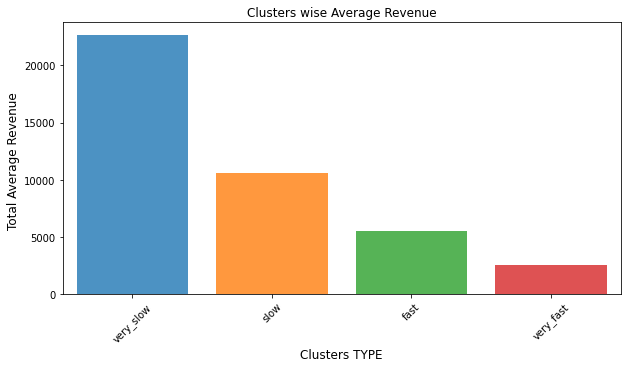

In [48]:
a=f_clust.groupby('Clusters')['Total Revenue'].mean().nlargest()
plt.figure(figsize=(10,5))
sns.barplot(a.index, a.values, alpha=0.8,saturation=50)
plt.title('Clusters wise Average Revenue')
plt.ylabel('Total Average Revenue ', fontsize=12)
plt.xlabel('Clusters TYPE', fontsize=12)
plt.xticks(rotation=45)
plt.show()

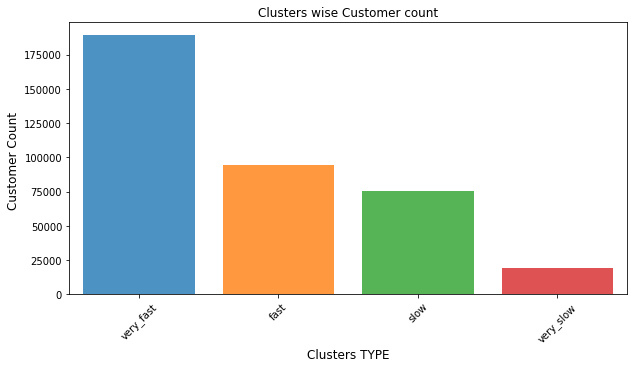

In [49]:
b=f_clust.groupby('Clusters')['Customer No.'].count().nlargest()
plt.figure(figsize=(10,5))
sns.barplot(b.index, b.values, alpha=0.8,saturation=50)
plt.title('Clusters wise Customer count')
plt.ylabel('Customer Count ', fontsize=12)
plt.xlabel('Clusters TYPE', fontsize=12)
plt.xticks(rotation=45)
plt.show()

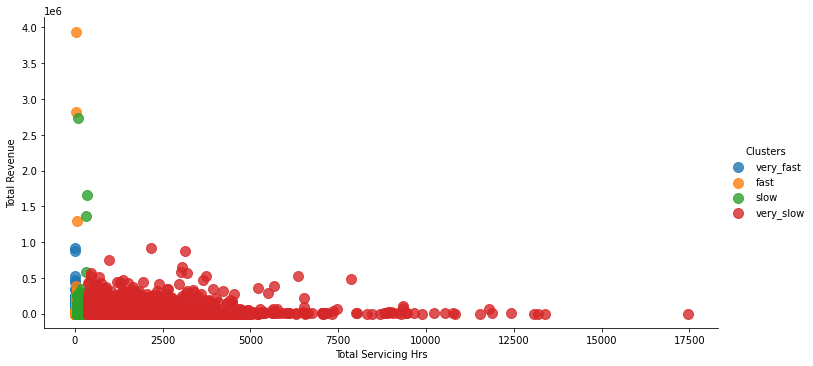

In [50]:
import seaborn as sns
sns.lmplot(data=f_clust,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})

# K-Means Clustering

In [89]:
final_cluster = non_zero_spenders

In [90]:
final_cluster.shape

(378423, 11)

In [91]:
final_cluster.describe()

,Year,Total Revenue,Total Servicing Hrs,Clusters
count,378423.000000,378423.000000,378423.000000,378423.000000
mean,2014.877449,5896.524469,84.779886,3.279262
std,1.166252,16968.399838,272.215078,1.493400
min,2012.000000,0.010000,-1.000000,0.000000
25%,2014.000000,774.720000,3.000000,3.000000
50%,2015.000000,2714.980000,17.500000,4.000000
75%,2016.000000,5734.360000,67.000000,4.000000
max,2016.000000,3943244.730000,17453.000000,5.000000


In [92]:
X = final_cluster.drop(['Year','Customer No.'],axis=1)

In [93]:
 from sklearn import preprocessing
 le = preprocessing.LabelEncoder()

In [94]:
#le=LabelEncoder()
X["Make"]=le.fit_transform(X["Make"])
X["Model"]=le.fit_transform(X["Model"])
X["City"]=le.fit_transform(X["City"])
# final_cluster["Clean_Location_Area"]=le.fit_transform(final_cluster["Clean_Location_Area"])
X["Cust Type"]=le.fit_transform(X["Cust Type"])
X["Order Type"]=le.fit_transform(X["Order Type"])
X["State"]=le.fit_transform(X["State"])

In [95]:
X

,Cust Type,Make,Model,City,State,Order Type,Total Revenue,Total Servicing Hrs,Clusters
0,6,13,144,340,18,4,2835.560000,321.000000,4
1,6,6,148,285,18,2,5562.050000,38.500000,4
2,6,6,148,285,18,4,599.840000,3.000000,4
3,6,6,148,285,18,2,4943.670000,5.000000,4
4,6,8,50,285,18,0,14167.070000,98.000000,3
...,...,...,...,...,...,...,...,...,...
379886,3,13,169,295,26,4,3477.370000,0.000000,1
379887,6,24,194,183,27,4,6870.950000,49.000000,5
379888,6,12,182,399,18,4,567.800000,406.000000,4
379889,6,12,238,278,25,4,4346.980000,0.000000,4


In [97]:
std = StandardScaler()
X=std.fit_transform(X)

In [67]:
scaled_data = pd.DataFrame(X)
scaled_data.columns = ['Cust Type','Make','Model','City',"State",'Order Type','Total Revenue','Total Servicing Hrs']
scaled_data.head()

,Cust Type,Make,Model,City,State,Order Type,Total Revenue,Total Servicing Hrs
0,0.041064,-0.026331,0.154677,0.755101,-0.013668,0.686097,-0.180392,0.867771
1,0.041064,-1.219184,0.209154,0.329406,-0.013668,-0.660553,-0.019712,-0.170012
2,0.041064,-1.219184,0.209154,0.329406,-0.013668,0.686097,-0.312150,-0.300424
3,0.041064,-1.219184,0.209154,0.329406,-0.013668,-0.660553,-0.056155,-0.293077
4,0.041064,-0.878369,-1.125530,0.329406,-0.013668,-2.007203,0.487409,0.048565


In [68]:
wcss=[]
for i in range(2,12):
    clf=KMeans(n_clusters=i,random_state=42,init='k-means++')
    clf.fit(X)
    wcss.append(clf.inertia_)

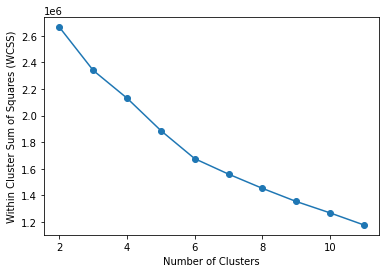

In [69]:
import matplotlib.pyplot as plt
x=np.arange(2,12)
plt.plot(x,wcss)
plt.scatter(x,wcss)
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.xlabel("Number of Clusters");

In [70]:
clf_final=KMeans(n_clusters=6,random_state=42,init='k-means++')

In [71]:
clf_final.fit(X)

KMeans(n_clusters=6, random_state=42)

In [72]:
final_cluster["Clusters"]=clf_final.predict(X)

In [73]:
final_cluster.head()

,Customer No.,Cust Type,Make,Year,Model,City,State,Order Type,Total Revenue,Total Servicing Hrs,Clusters
0,1,Retail,MARUTI SUZUKI,2013,OMNI,pune,maharashtra,Running Repairs,2835.560000,321.000000,4
1,10,Retail,GENERAL MOTORS,2012,OPTRA,mumbai,maharashtra,Paid Service,5562.050000,38.500000,4
2,10,Retail,GENERAL MOTORS,2012,OPTRA,mumbai,maharashtra,Running Repairs,599.840000,3.000000,4
3,10,Retail,GENERAL MOTORS,2013,OPTRA,mumbai,maharashtra,Paid Service,4943.670000,5.000000,4
4,100,Retail,HONDA,2012,CITY,mumbai,maharashtra,Accidental,14167.070000,98.000000,3


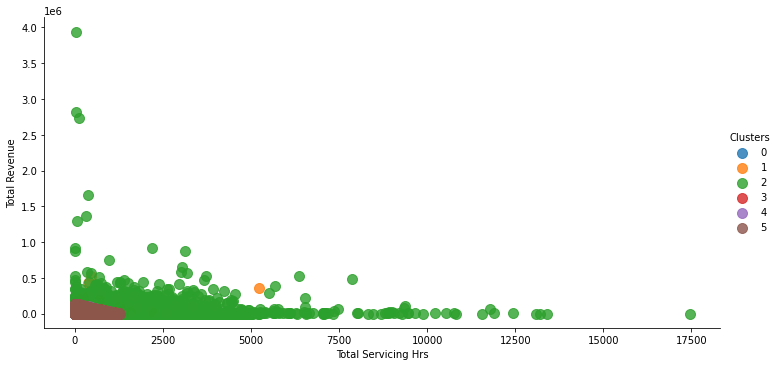

In [80]:
final_cluster.groupby(['Clusters']).agg({'Total Revenue':'mean','Total Servicing Hrs':'mean','Customer No.':'count'}).sort_values('Total Revenue',ascending=False)

# final_cluster.groupby('Clusters')['Customer No.'].count()
# final_cluster.groupby('Clusters')['Total Revenue'].mean()

import seaborn as sns
sns.lmplot(data=final_cluster,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})

In [74]:
cluster_excel = final_cluster.groupby(["Clusters","Cust Type"]).agg({"Total Revenue":"mean","Total Servicing Hrs":'mean',"Customer No.":"count"}).sort_values('Total Revenue')

In [75]:
final_cluster.groupby(["Clusters","Order Type"]).agg({"Total Revenue":"mean","Total Servicing Hrs":'mean',"Customer No.":"count"})

Total Revenue  Total Servicing Hrs  Customer No.
Clusters Order Type                                                         
0        Accidental          15279.654274           165.705645          5176
         Mechanical           3266.105911            65.124194          1499
         Paid Service         4665.277965            60.516012         13982
         Repeat Order         2003.370000            13.000000             2
         Running Repairs      3586.756416            45.069603         28075
         SMC Redemption       2384.697461            38.669802          1909
         SMC Value Package    4106.745194             7.785949          1523
         WBW Order           22312.925000           244.500000             2
1        Accidental          25462.758559           283.351168           118
         Mechanical          13612.628000           428.650000            10
         Paid Service        24411.168075           125.508394           187
         Running Repairs     19024.223566           106.741962           272
         SMC Redemption       1674.224330           137.250000             4
         SMC Value Package    9170.525000            20.416667             6
2        Accidental          95501.134683          1291.768092          2417
         Mechanical          20177.149453          1699.187500           128
         Paid Service        23763.686352          2049.771048          1143
         Running Repairs     31091.760385          2091.801110          1377
         SMC Redemption       1964.378069          2094.700000            60
         SMC Value Package   27756.112857          1909.461538             7
3        Accidental          12690.709336           142.098209         11400
         Mechanical           3526.412216            72.070619          4233
         Paid Service         5080.886945            63.265099         35383
         Running Repairs      3322.190665            49.007937         58313
         SMC Redemption       2202.486062            57.011309          3629
         SMC Value Package    3459.699068             9.523747          3025
         WBW Order            8499.120000           164.166667             6
4        Accidental          14040.385263           144.654534         12336
         Mechanical           3896.434045            69.895816          4920
         Paid Service         5977.995917            62.179575         43564
         Running Repairs      3946.569165            47.910037         71356
         SMC Redemption       2212.232493            61.555654          4554
         SMC Value Package    3696.738246             8.270512          3831
         WBW Order            5422.320000            22.750000             4
5        Accidental          16224.941138           154.541270          6820
         Mechanical           3542.499417            70.066547          2505
         Paid Service         5666.778985            72.913309         17287
         Running Repairs      3421.412016            49.692216         34985
         SMC Redemption       2264.444470            53.836048          1283
         SMC Value Package    3292.523434            12.041322          1089
         WBW Order            4656.066667            80.000000             3

In [76]:
cluster_excel.columns = ['Avg revenue','Avg Servicing Hrs','Customer Count']

In [77]:
cluster_Excel = cluster_excel.reset_index()

In [78]:
cluster_excel.sort_values(by='Clusters')

Avg revenue  Avg Servicing Hrs  Customer Count
Clusters Cust Type                                                         
0        Retail              4998.602192          60.438798           52168
1        Franchise           5323.646000         179.383333              10
         Corporate others   20485.646350         160.012045             225
         Fleets             20668.854731         151.566172             260
         Corporate- M&M     28485.489791         134.250717             102
2        Retail             57808.243216        1693.319766            5128
         Fleets           1813912.367500        4675.596140               4
3        Insurance           4235.490000          48.000000               1
         Retail              4755.423363          62.574119          115929
         MFCWL               5406.986345          64.214689              59
4        Retail              5396.850712          60.949059          140500
         MFCWL               6312.721231          70.190342              65
5        MFCWL               5334.544063          83.894792              32
         Retail              5372.566005          67.378210           63940

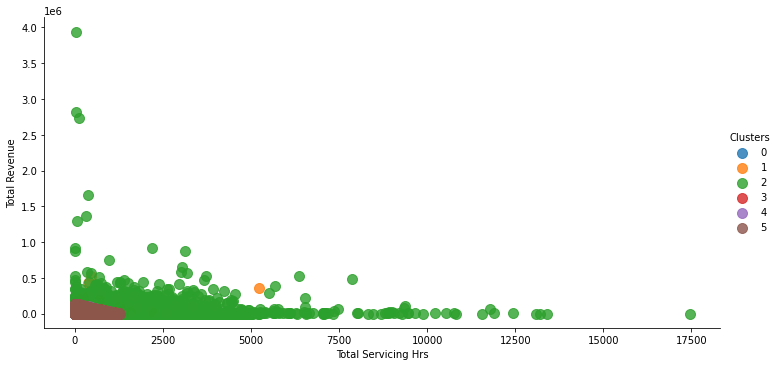

In [79]:
sns.lmplot(data=final_cluster,x='Total Servicing Hrs', y='Total Revenue', hue='Clusters', fit_reg=False, legend=True, legend_out=True,size=5,aspect=2,scatter_kws={"s": 100})